In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

## Padding a 2D mesh

This notebook shows how to pad a 2D mesh. Note that padding a 2d mesh is done on the contour (before triangulation).

### Generating some data

This cell generates a simple 2d plane.

(48, 120)


<IPython.core.display.Javascript object>


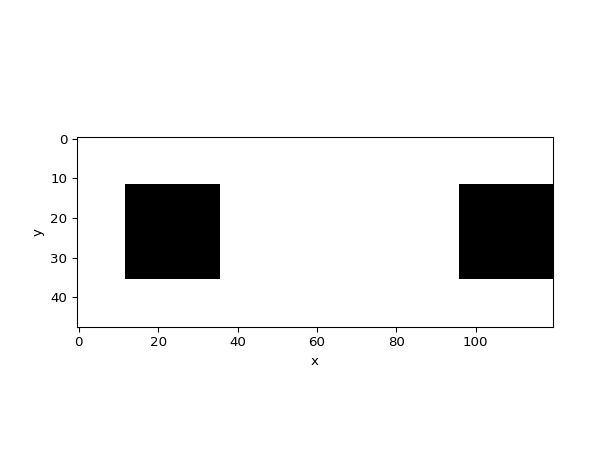

<AxesSubplot:xlabel='x', ylabel='y'>

In [2]:
import numpy as np
from nanomesh import Plane

n = 24
m = 12

data = np.ones([2*n, 5*n], dtype=int)
data[m:3*m, m:3*m] = 0
data[m:3*m, 4*n:5*n] = 0

print(data.shape)

plane = Plane(data)
plane.show()

### Generating the contour

<IPython.core.display.Javascript object>


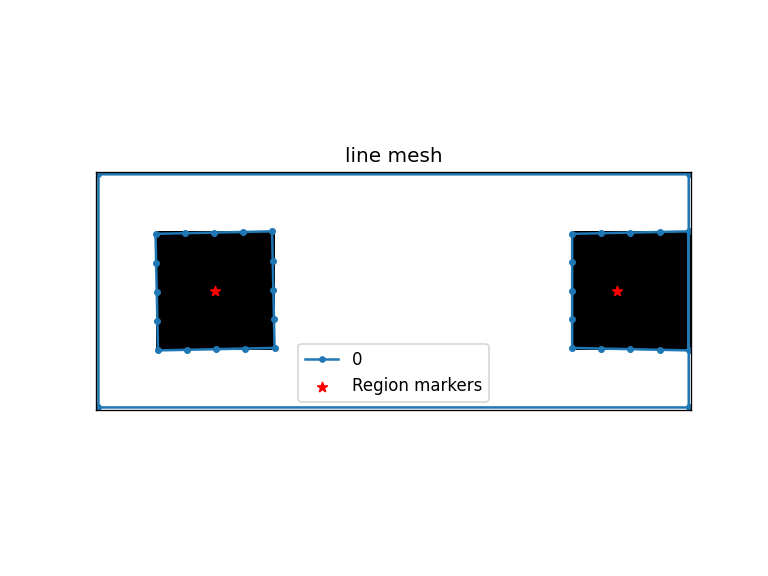

<AxesSubplot:title={'center':'line mesh'}>

In [3]:
from nanomesh.mesh2d import Mesher2D

mesher = Mesher2D(plane)
mesher.generate_contour()
mesher.show_contour()

### Padding different sides

The mesh can be padded using a similar API as 3d meshes. Each side (top/bottom, left/right) can be padded. A width must be specified. The label is optional.

<IPython.core.display.Javascript object>


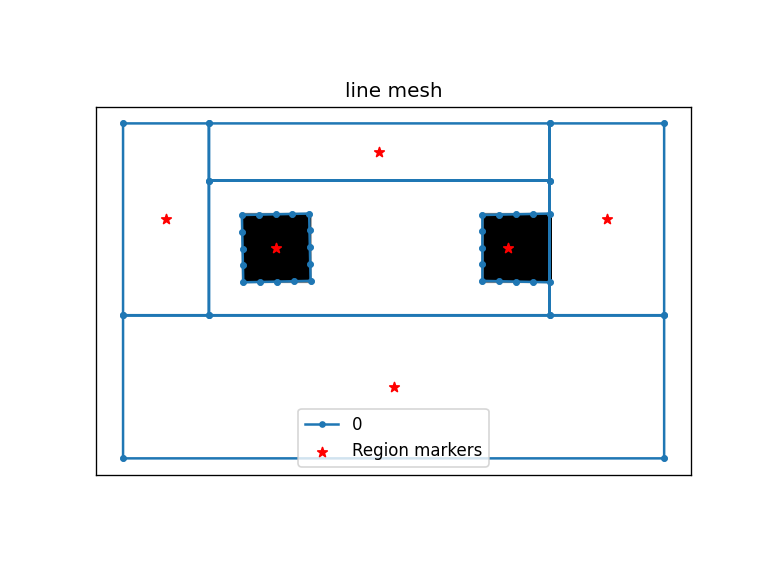

<AxesSubplot:title={'center':'line mesh'}>

In [4]:
mesher.pad_contour(side='top', width=20, label=11)
mesher.pad_contour(side='left', width=30, label=12)
mesher.pad_contour(side='right', width=40, label=13)
mesher.pad_contour(side='bottom', width=50, label=14)
mesher.show_contour()

### Generate triagonal mesh

Finally, generate the triagonal mesh.

<IPython.core.display.Javascript object>


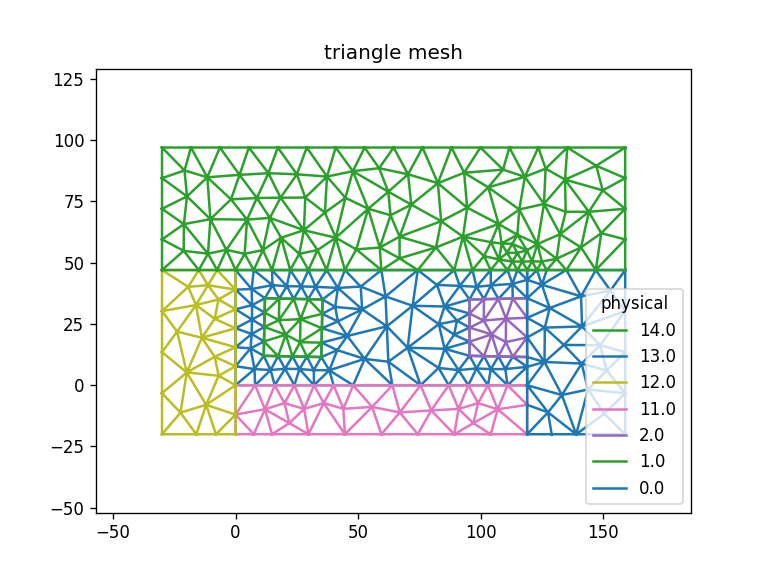

In [5]:
mesh = mesher.triangulate(opts='pAq30a100e')
mesh.plot()

### Padding left / right sides

The width, mesh quality, and label assigned to this this area can be defined.

This example shows how to double pad the left and right sides with different triangle sizes for each step.

<IPython.core.display.Javascript object>


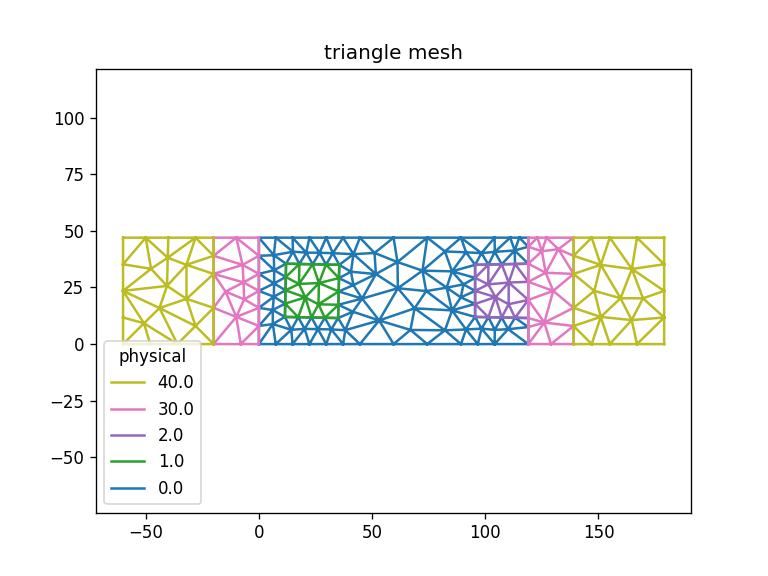

In [6]:
mesher = Mesher2D(plane)
mesher.generate_contour()

mesher.pad_contour(side='left', width=20, label=30)
mesher.pad_contour(side='left', width=40, label=40)

mesher.pad_contour(side='right', width=20, label=30)
mesher.pad_contour(side='right', width=40, label=40)

padded_mesh = mesher.triangulate(opts='pAq30a100e')

padded_mesh.plot()

### Spiral mesh

This pattern is infinitely extensible. The example below shows the flexibility of the method.

<IPython.core.display.Javascript object>


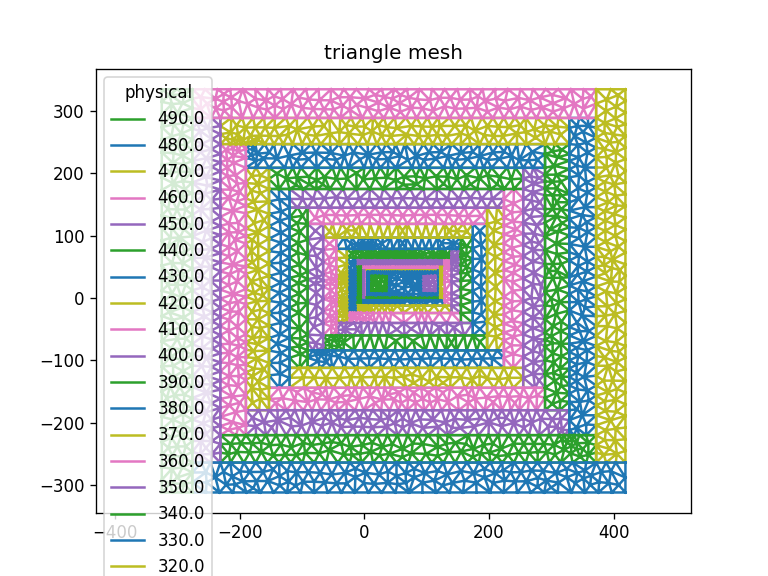

In [7]:
from itertools import cycle
import numpy as np

mesher = Mesher2D(plane)
mesher.generate_contour()

choices = ('left', 'bottom', 'right', 'top')

for i, side in zip(range(1, 50), cycle(choices)):
    mesher.pad_contour(side=side, width=i, label=i*10)

spiral_mesh = mesher.triangulate(opts='pAq30a200e')    
    
spiral_mesh.plot()    